# Examining Various Relationships Between American Industries and the Amount of Greenhouse Gases Produced

This dataset revolves around the United States Environmental Protection Agency's 2022 collection of supply chain emissions (aka greenhouse gases) from various industries. In this project, I will create data visualizations to answer particular questions about this dataset. This EPA dataset utilizes various categories to sort out information, the categories are as listed:
- 2017 NAICS Code  _(NAICS stands for "North American Industry Classification System")_
- 2017 NAICS Title
- GHG  _(the __type__ of greenhouse gas, but in this case they are looping them all into consideration)_
- Unit _(kg of $CO_{2}$ per US dollar)_
- Supply Chain Emission Factors without Margins
- Margins of Supply Chain Emission Factors
- Supply Chain Emission Factors with Margins
- Reference USEEIO Code  _(USEEIO stands for US Environmentally-Extended Input Output)_

### Dataset Link: 

https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6

### Official US EPA Synopsis:
https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fpasteur.epa.gov%2Fuploads%2F10.23719%2F1531143%2Fdocuments%2FAboutv1.3SupplyChainGHGEmissionFactors.docx&wdOrigin=BROWSELINK

### First, we need to install the proper packages...

In [7]:
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib

### Great! Now we need to import the libraries...

In [9]:
import pandas as pd
import seaborn as sns
import numpy as py
import matplotlib.pyplot as plt

### Now we need to read in the data file! 

#### As a reminder...this data is from the US Environmental Protection Agency, and it lists greenhouse gas emissions data for the 2022 year.

##### __Note__ that the values for the columns... 
- "Supply Chain Emission Factors without Margins"
- "Margins of Supply Chain Emission Factors"
- "Supply Chain Emission Factors with Margins"
##### ...are all in __kg of $CO_{2}$ per US dollar__. In other words, the unit of measurement is __kilograms of $CO_{2}$ produced for every US dollar a consumer spends on that service/good__.

Basically, we as consumers have a lot of power with how we spend our dollars!

In [11]:
df = pd.read_csv("supply-chain_ghg_emissions.csv")
df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
...,...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00
1014,813940,Political Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00


### Awesome! Now that we can see what the data looks like as a whole, let's take a look at what data types we have in this dataset!

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


### Interesting! It looks like we only have 64-bit integers, 64-bit floats, and objects in our dataset!

#### Cool Cool! Now let's start cleaning the data by looking to see if we have any null values!

Cleaning the data is important, as it lets us know if we have null values, duplicate values, and so on! On this particular dataset, we are going to check for null values and duplicate values. We are also going to be dropping the "Reference USEEIO Code column", as this particular column won't help us in our analysis.

In [15]:
clean_df = df
clean_df.isnull().sum()

2017 NAICS Code                                  0
2017 NAICS Title                                 0
GHG                                              0
Unit                                             0
Supply Chain Emission Factors without Margins    0
Margins of Supply Chain Emission Factors         0
Supply Chain Emission Factors with Margins       0
Reference USEEIO Code                            0
dtype: int64

### Wow! No null values! This is great! Let's see if we have any duplicates now! 

In [17]:
print("Number of duplicates present:", clean_df.duplicated().sum())

Number of duplicates present: 0


### Yay! No duplicates! This means that every entry in our dataset is unique! 

### Now we are going to drop the "Reference USEEIO Code" column...

For this project, I don't want to use this column or its values. I'm not interested in tracking the USEEIO codes for this project, so by dropping this column, I can narrow down the scope of relevant data!

In [19]:
dropclean_df = clean_df.drop("Reference USEEIO Code", axis = 1)
dropclean_df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1014,813940,Political Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128


### Sweet! Notice how the "Reference USEEIO Code" column has now been dropped? 
#### Now we can start the visualization process! 
#### We are going to look into three particular aspects of the data...

-  Which industries produce the most greenhouse gas emissions?
-  What is the numerical difference between the top 5 emissions-producing industries?
-  Manufacturing emissions vs Agricultural emissions.

Our goal with these questions is to get a general overview of how greenhouse gas emissions are distributed among American Industries! This project isn't going to get into the nitty-gritty details of _all_ aspects of the data, but we want to be able to say "...hey, this data shows that American industries seem to be following ____ trend". 

### Great! Let's visualize our first question:
__Which industries produce the most greenhouse gas emissions?__

Now that we have defined our first problem, we'll want to figure out exactly how we are going to visualize our data. To start, this dataset has LOTS and LOTS of emissions values for _various_ industries. So, we'll only select the __top ten__ industries to look at. We will examine their emissions output based off their "Supply Chain Emission Factors without Margins".

We should also double-check the names of our columns, since they are a bit longer.

In [22]:
print(dropclean_df.columns.tolist())

['2017 NAICS Code', '2017 NAICS Title', 'GHG', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins']



### Cool cool! Now that we for sure know the names of our columns, let's continue on!

Here we will use the _nlargest_ Pandas function to find out the top ten industries with the "Supply Chain Emission Factors without Margins".

In [24]:
top_10_df = dropclean_df.nlargest(10, 'Supply Chain Emission Factors without Margins')
top_10_df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
285,327310,Cement Manufacturing,All GHGs,"kg CO2e/2022 USD, purchaser price",3.846,0.078,3.924
30,112111,Beef Cattle Ranching and Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893
31,112112,Cattle Feedlots,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893
33,112130,Dual-Purpose Cattle Ranching and Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893
32,112120,Dairy Cattle and Milk Production,All GHGs,"kg CO2e/2022 USD, purchaser price",1.682,0.042,1.724
653,486110,Pipeline Transportation of Crude Oil,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619
654,486210,Pipeline Transportation of Natural Gas,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619
655,486910,Pipeline Transportation of Refined Petroleum P...,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619
656,486990,All Other Pipeline Transportation,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619
290,327410,Lime Manufacturing,All GHGs,"kg CO2e/2022 USD, purchaser price",1.560,0.063,1.623


### That's crazy! I wasn't expecting Cement Manufacturing to beat out everyone else, and by nearly a full point too!

This neat chart is fine and dandy, but it can be hard to truly visualize how much 'space' each industry takes up. So, let's try using a pie chart from the Pandas library to bring some more visual emphasis to this data!

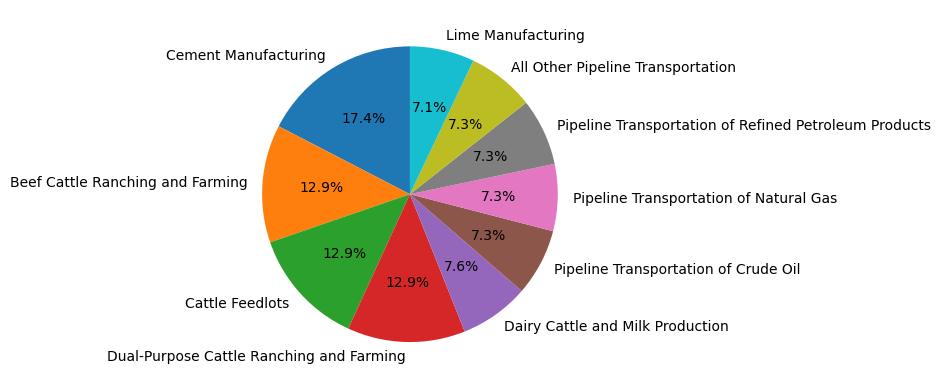

In [26]:
emissions_no_margins = top_10_df["Supply Chain Emission Factors without Margins"]
title = top_10_df["2017 NAICS Title"]
plt.pie(emissions_no_margins, labels=title, autopct='%1.1f%%', startangle=90)
plt.show()

### Hmm, the pie chart looks okay, but a bar chart would probably be an even better visualization for this question! 
#### As you can see, the pie chart isn't very accurate in showing the discrepancies between "Cement Manufacturing" and "Beef and Cattle Ranching". Hopefully a bar chart will be more forthcoming with showing this difference!


Here we'll use a seaborn bar chart to visualize (along with matplotlib's _.figure_ function and _.xticks_ function to adjust the size and labeling)!

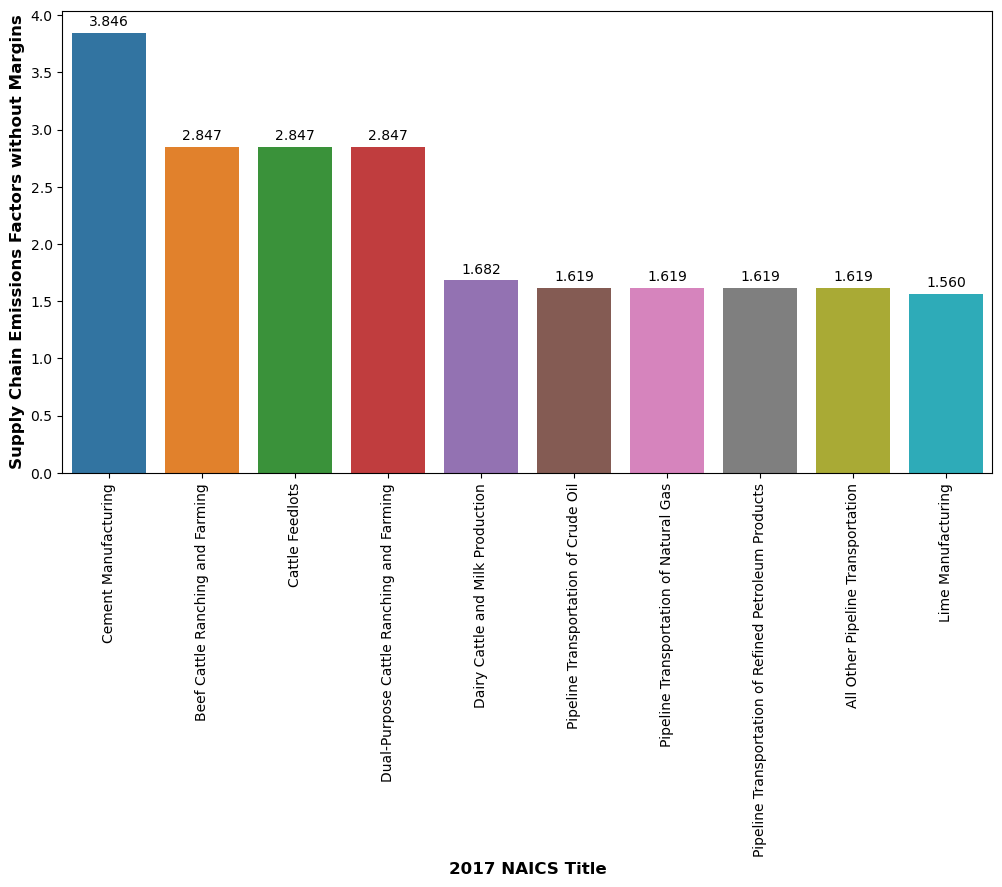

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90, ha='center')
e_bar = sns.barplot(x=title, y=emissions_no_margins, hue=title)
for container in e_bar.containers:
    e_bar.bar_label(container, fmt='%.3f', fontsize=10, color='black', padding=3)
plt.ylabel("Supply Chain Emissions Factors without Margins",fontsize=12, fontweight="bold")
plt.xlabel("2017 NAICS Title", fontsize=12, fontweight="bold")
plt.show()

### Awesome! The bar chart was magnificent in showing the I think it's pretty safe to say that we've answered our first question about this dataset:
__Which industries produce the most greenhouse gas emissions?__

#### What does this mean?

We can see that from the EPA's 2022 data, the Cement Manufacturing industry has beaten out everyone else in terms of kg of $C0_{2}$ produced per USD. With even more data and visualizations, we could probably see some trends aligning with the construction industry or even with infrastructure creation/maintenance. 

We should also examine the other industries that made the top ten. 

If we are to separate the 10 specific industries into more general fields, there is a pretty strong case for these two:
- Industrial Manufacturing
- Cattle Agriculture

The dataset used for this project is very broad and does its best to encompass _all_ American industries, and as a result, there is no information on how greenhouse gas emissions are split _within_ these industries. In other words, we don't know the __allocation__ of emissions within these fields. Are they mostly due to the transportation, the creation, or the implementation of these goods/services? With further examination and more datasets, these questions can be answered. As of now, this data narrows down where most greenhouse gases are being emitted from, and that's as good a start as any!

### Now that we've answered our first question, let's move on to the second:
__What is the numerical difference between the top 3 emissions-producing industries?__

To start, it's important for us to examine what the numerical columns mean! 

In this dataset, we have 3 numerical columns:
- Supply Chain Emission Factors without Margins
- Margins of Supply Chain Emission Factors
- Supply Chain Emission Factors with Margins

There is not a formula included in this dataset nor in the official synopsis, but what we can make out is the meaning of the columns!

__Supply Chain Emission Factors without Margins__ (_aka SEF_) has values derived from the USEEIO model (this was created by the same institution whose USEEIO codes we cut out earlier) and the sector attribution model for GHGs. These values calculate emissions based on economic input-output data, and this is where the __kg of $CO_{2}$ per US dollar__ comes into play. These values focus solely on consumer spending of a product/service, _not_ on things like transportation.

__Margins of Supply Chain Emission Factors__ (_aka MEF_) take into account the costs of the distribution of goods, things like retail markups or transportation costs.

__Supply Chain Emissions with Margins__ is the combined value of SEF and MEF. Due to the SEF values being higher than the MEF values, this signals that it is likely that the production of these goods/services is more environmentally costly than the distribution of them.

_ChatGPT-4 was used to help me understand the breakdown of these columns!_

### Let us produce another table of the data to jog our memory!

In [33]:
dropclean_df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1014,813940,Political Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128


### Great! Now let's continue on with filtering the data so we only see the top 5 largest industries!

In [35]:
top_5_df = dropclean_df.nlargest(5, 'Supply Chain Emission Factors without Margins')
top_5_df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
285,327310,Cement Manufacturing,All GHGs,"kg CO2e/2022 USD, purchaser price",3.846,0.078,3.924
30,112111,Beef Cattle Ranching and Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893
31,112112,Cattle Feedlots,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893
33,112130,Dual-Purpose Cattle Ranching and Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893
32,112120,Dairy Cattle and Milk Production,All GHGs,"kg CO2e/2022 USD, purchaser price",1.682,0.042,1.724


### Alright! That wasn't so bad since we were familiar with how to filter out the largest portions!

#### Now we need to do some math to find out the differences between each of the industries.

To answer this question, it would be relevant to include all numerical columns (Supply Chain Emission Factors without Margins, Margins of Supply Chain Emission Factors, Supply Chain Emission Factors with Margins). We want to see how each differs in a visual format. Luckily, the three middle rows all have the same values!

### Let's first look at the SEF column's differences! (aka the "Supply Chain Emission Factors without Margins" column)

In [38]:
result1 = top_5_df.iloc[0]["Supply Chain Emission Factors without Margins"] - top_5_df.iloc[1]["Supply Chain Emission Factors without Margins"]
print("The difference between the Supply Chain Emissions Factors for Cement Manufacturing vs. Beef...Farming/Cattle Feedlots/Dual-Purpose...Farming is", result1)

result2 = top_5_df.iloc[0]["Supply Chain Emission Factors without Margins"] - top_5_df.iloc[4]["Supply Chain Emission Factors without Margins"]
print("The difference between the Supply Chain Emissions Factors for Cement Manufacturing vs. Dairy Cattle and Milk Production is", result2)

result3 = top_5_df.iloc[1]["Supply Chain Emission Factors without Margins"] - top_5_df.iloc[4]["Supply Chain Emission Factors without Margins"]
print("The difference between the Supply Chain Emissions Factors for Beef Cattle Ranching and Farming vs. Dairy Cattle and Milk Production is", result3)

The difference between the Supply Chain Emissions Factors for Cement Manufacturing vs. Beef...Farming/Cattle Feedlots/Dual-Purpose...Farming is 0.9990000000000001
The difference between the Supply Chain Emissions Factors for Cement Manufacturing vs. Dairy Cattle and Milk Production is 2.164
The difference between the Supply Chain Emissions Factors for Beef Cattle Ranching and Farming vs. Dairy Cattle and Milk Production is 1.165


### Now we should put this information into a visual! We'll use a bar graph to show discrepancies!

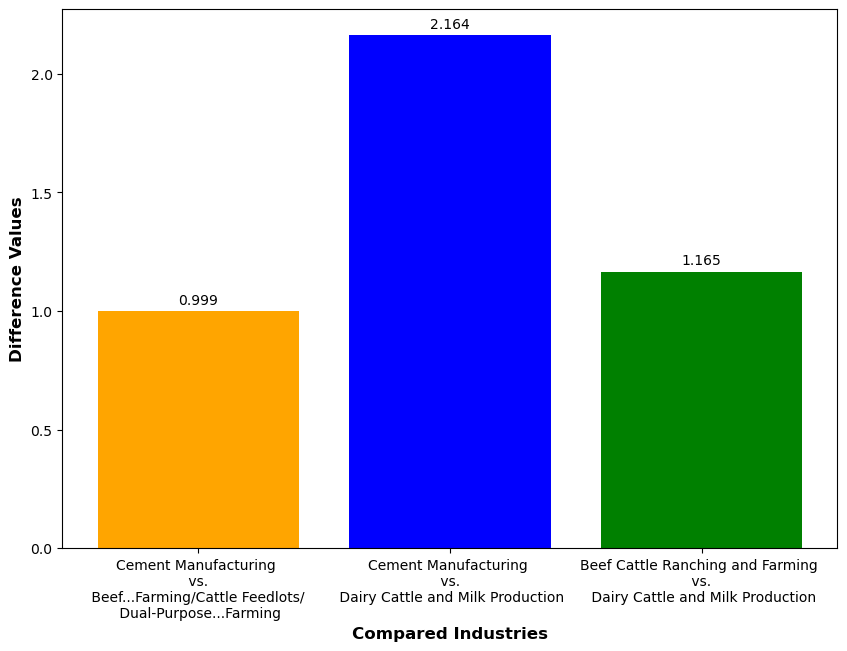

In [40]:
categories = ["Cement Manufacturing \n vs. \n Beef...Farming/Cattle Feedlots/ \n Dual-Purpose...Farming", "Cement Manufacturing \n vs. \n Dairy Cattle and Milk Production", 
              "Beef Cattle Ranching and Farming \n vs. \n Dairy Cattle and Milk Production"]
values = [result1, result2, result3]

fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation=0, ha='center')
bar = ax.bar(categories, values, color=["orange","blue","green"])
ax.set_ylabel("Difference Values", fontsize=12, fontweight="bold")
ax.set_xlabel("Compared Industries", fontsize=12, fontweight="bold")
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=10, color='black', padding=3)

### Now let's look at the MEF column's differences! (aka the "Margins of Supply Chain Emission Factors")

In [42]:
result4 = top_5_df.iloc[0]["Margins of Supply Chain Emission Factors"] - top_5_df.iloc[1]["Margins of Supply Chain Emission Factors"]
print("The difference between the Margins of Supply Chain Emission Factors for Cement Manufacturing vs. Beef...Farming/Cattle Feedlots/Dual-Purpose...Farming is", result4)

result5 = top_5_df.iloc[0]["Margins of Supply Chain Emission Factors"] - top_5_df.iloc[4]["Margins of Supply Chain Emission Factors"]
print("The difference between the Margins of Supply Chain Emission Factors for Cement Manufacturing vs. Dairy Cattle and Milk Production is", result5)

result6 = top_5_df.iloc[1]["Margins of Supply Chain Emission Factors"] - top_5_df.iloc[4]["Margins of Supply Chain Emission Factors"]
print("The difference between the Margins of Supply Chain Emission Factors for Beef Cattle Ranching and Farming vs. Dairy Cattle and Milk Production is", result6)

The difference between the Margins of Supply Chain Emission Factors for Cement Manufacturing vs. Beef...Farming/Cattle Feedlots/Dual-Purpose...Farming is 0.033
The difference between the Margins of Supply Chain Emission Factors for Cement Manufacturing vs. Dairy Cattle and Milk Production is 0.036
The difference between the Margins of Supply Chain Emission Factors for Beef Cattle Ranching and Farming vs. Dairy Cattle and Milk Production is 0.0029999999999999957


### Same protocol here...making another bar graph!

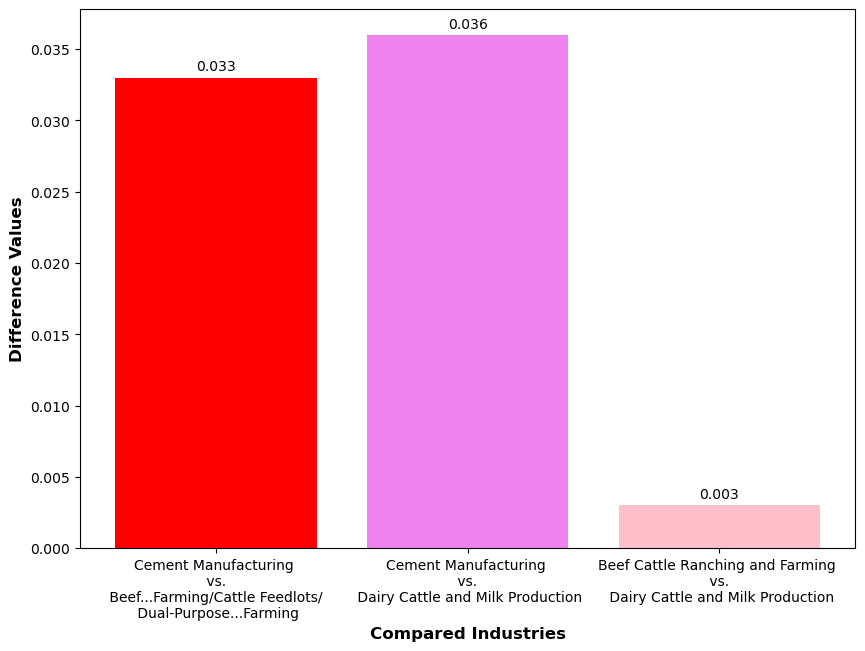

In [44]:
categories = ["Cement Manufacturing \n vs. \n Beef...Farming/Cattle Feedlots/ \n Dual-Purpose...Farming", "Cement Manufacturing \n vs. \n Dairy Cattle and Milk Production", 
              "Beef Cattle Ranching and Farming \n vs. \n Dairy Cattle and Milk Production"]
values = [result4, result5, result6]

fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation=0, ha='center')
bar = ax.bar(categories, values, color=["red","violet","pink"])
ax.set_ylabel("Difference Values", fontsize=12, fontweight="bold")
ax.set_xlabel("Compared Industries", fontsize=12, fontweight="bold")
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=10, color='black', padding=3)

### Alrighty! Now let's look at the combined differences in the SEF+MEF column! (aka the Supply Chain Emissions Factors with Margins)

In [46]:
result7 = top_5_df.iloc[0]["Supply Chain Emission Factors with Margins"] - top_5_df.iloc[1]["Supply Chain Emission Factors with Margins"]
print("The difference between the Supply Chain Emission Factors with Margins for Cement Manufacturing vs. Beef...Farming/Cattle Feedlots/Dual-Purpose...Farming is", result7)

result8 = top_5_df.iloc[0]["Supply Chain Emission Factors with Margins"] - top_5_df.iloc[4]["Supply Chain Emission Factors with Margins"]
print("The difference between the Supply Chain Emission Factors with Margins for Cement Manufacturing vs. Dairy Cattle and Milk Production is", result8)

result9 = top_5_df.iloc[1]["Supply Chain Emission Factors with Margins"] - top_5_df.iloc[4]["Supply Chain Emission Factors with Margins"]
print("The difference between the Supply Chain Emission Factors with Margins for Beef Cattle Ranching Farming vs. Dairy Cattle and Milk Production is", result9)

The difference between the Supply Chain Emission Factors with Margins for Cement Manufacturing vs. Beef...Farming/Cattle Feedlots/Dual-Purpose...Farming is 1.0310000000000001
The difference between the Supply Chain Emission Factors with Margins for Cement Manufacturing vs. Dairy Cattle and Milk Production is 2.2
The difference between the Supply Chain Emission Factors with Margins for Beef Cattle Ranching Farming vs. Dairy Cattle and Milk Production is 1.1689999999999998


### You know the drill! Another bar graph!

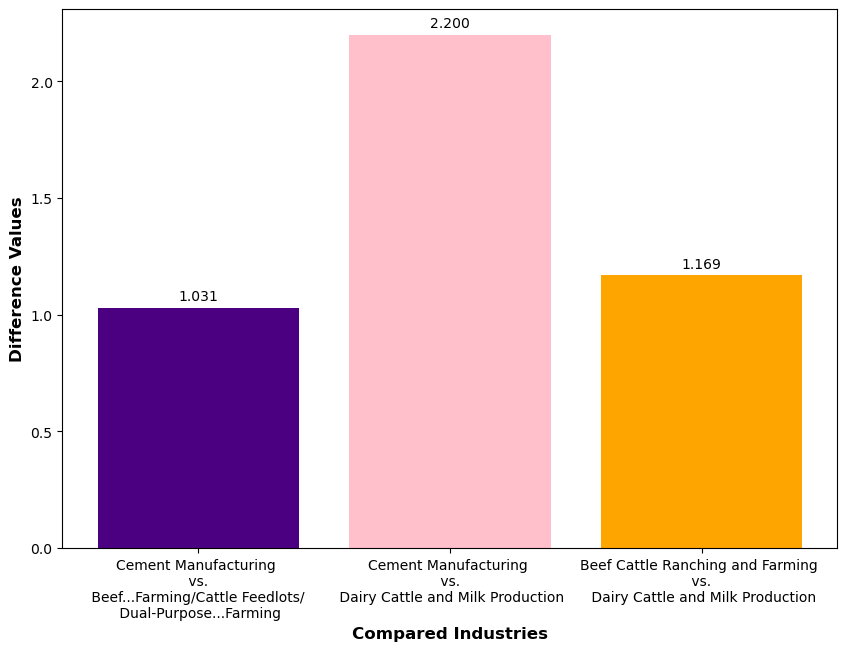

In [48]:
categories = ["Cement Manufacturing \n vs. \n Beef...Farming/Cattle Feedlots/ \n Dual-Purpose...Farming", "Cement Manufacturing \n vs. \n Dairy Cattle and Milk Production", 
              "Beef Cattle Ranching and Farming \n vs. \n Dairy Cattle and Milk Production"]
values = [result7, result8, result9]

fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation=0, ha='center')
bar = ax.bar(categories, values, color=["indigo","pink","orange"])
ax.set_ylabel("Difference Values", fontsize=12, fontweight="bold")
ax.set_xlabel("Compared Industries", fontsize=12, fontweight="bold")
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=10, color='black', padding=3)

### Well, that settles it! We've looked at the top 5 emissions-producing industries and their numerical differences!
We answered the question: __What is the numerical difference between the top 5 emissions-producing industries?__

Hmm, but how does this relate to our first question: __Which industries produce the most greenhouse gas emissions?__

Well, let's first go over our process for answering our second question. 

We were able to first assert that the three middle rows--Beef Cattle Ranching and Farming, Cattle Feedlots, and Dual-Purpose Cattle Ranching and Farming--all have the same values for all columns. So, we lumped them together; this greatly narrowed down our mathematical focus.

Then, we were able to conduct some simple subtraction to determine the numerical differences between each section. These results are what gives us insight into how much more or less __kg of $CO_{2}$ per US dollar__ we as a society make in each industry. This __kg of $CO_{2}$ per US dollar__ value is what we are truly looking at in this section!

With the graphs and numerical results, we can truly see how much more __kg of $CO_{2}$ per US dollar__ the Cement Manufacturing industry makes when compared to the Dairy Cattle and Milk Production industry (among other things).

This all relates to our first question, __"Which industries produce the most greenhouse gas emissions?"__, by emphasizing the disparities between the top 5 industries. As we know from before, the top industries do not all produce the same _amount_ of greenhouse gases. So, by narrowing down our focus to the top 5, we can see which sectors are the ones who do the most when it comes to GHG (greenhouse gas) production. In other words, we've dived even deeper into finding out GHG production!

### Finally! Now it's time for us to examine our last question:
__Manufacturing emissions vs. Agricultural emissions__

Our goal with this section is to use the 2017 NAICS Codes to separate the manufacturing and agricultural sectors from everything else, and then do some visualizations on their emissions! We'll also only be using the "Supply Chain Emission Factors without Margins" column this time.

We'll use this link to figure out the sectors we need to separate: 
https://www.census.gov/naics/?58967?yearbck=2017 

It seems like we'll need to sort out the codes by the first 2 numbers. 

__Agriculture__ - notated by '11XXXX'

__Manufacturing__ - notated by '31XXXX', '32XXXX', '33XXXX'.

### As a reminder of what we're working with, we'll go ahead and reload our cleaned dataframe.

In [52]:
dropclean_df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1014,813940,Political Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128


### Now we separate the Agricultural industry from the rest of them!


In [54]:
dropclean_df["NAICS 2 Digits"] = dropclean_df["2017 NAICS Code"].astype(str).str[:2]
agriculture_df = dropclean_df[dropclean_df["NAICS 2 Digits"]=='11']
print(agriculture_df)

    2017 NAICS Code                                   2017 NAICS Title  \
0            111110                                    Soybean Farming   
1            111120                   Oilseed (except Soybean) Farming   
2            111130                           Dry Pea and Bean Farming   
3            111140                                      Wheat Farming   
4            111150                                       Corn Farming   
..              ...                                                ...   
59           115114  Postharvest Crop Activities (except Cotton Gin...   
60           115115            Farm Labor Contractors and Crew Leaders   
61           115116                           Farm Management Services   
62           115210           Support Activities for Animal Production   
63           115310                    Support Activities for Forestry   

         GHG                               Unit  \
0   All GHGs  kg CO2e/2022 USD, purchaser price   
1   All G

### Now we separate the Manufacturing industry from the rest of them!


In [56]:
dropclean_df["NAICS-2-Digits"] = dropclean_df["2017 NAICS Code"].astype(str).str[:2]
manufact1_df = dropclean_df[dropclean_df["NAICS-2-Digits"]=='31']
manufact2_df = dropclean_df[dropclean_df["NAICS-2-Digits"]=='32']
manufact3_df = dropclean_df[dropclean_df["NAICS-2-Digits"]=='33']
print(manufact1_df)
print(manufact2_df)
print(manufact3_df)

     2017 NAICS Code                                   2017 NAICS Title  \
127           311111                     Dog and Cat Food Manufacturing   
128           311119                    Other Animal Food Manufacturing   
129           311211                                      Flour Milling   
130           311212                                       Rice Milling   
131           311213                                 Malt Manufacturing   
..               ...                                                ...   
195           315990  Apparel Accessories and Other Apparel Manufact...   
196           316110             Leather and Hide Tanning and Finishing   
197           316210                             Footwear Manufacturing   
198           316992            Women's Handbag and Purse Manufacturing   
199           316998  All Other Leather Good and Allied Product Manu...   

          GHG                               Unit  \
127  All GHGs  kg CO2e/2022 USD, purchaser pric

### Well well well...that's a lot of data...

Not to worry! Now we're just going to do a line plot to give us a rough idea of each industry's GHG (greenhouse gases) production. The y-axis is going to by the unit of measurement, in this case, __kg of $CO_{2}$ per US dollar__. The x-axis is going to be the index of the data frame, in other words, the x-axis is the row number with which a particular industry was placed at.

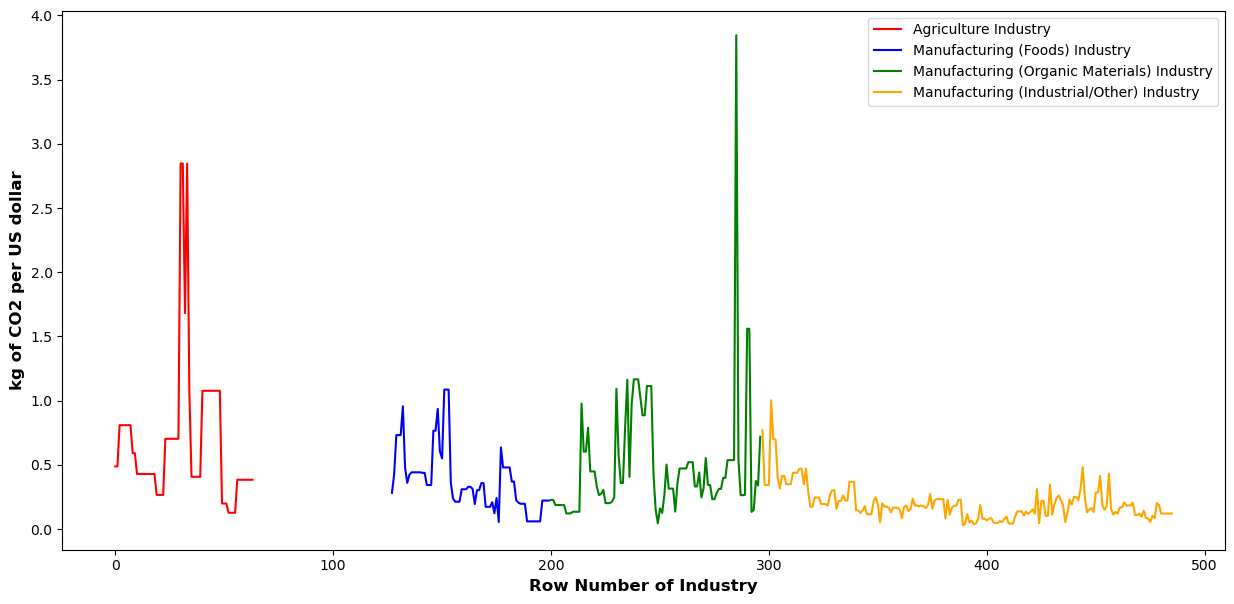

In [58]:
plt.figure(figsize=(15,7))
plt.plot(agriculture_df.index, agriculture_df["Supply Chain Emission Factors without Margins"], color='red', label='Agriculture Industry')
plt.plot(manufact1_df.index, manufact1_df["Supply Chain Emission Factors without Margins"], color='blue', label='Manufacturing (Foods) Industry')
plt.plot(manufact2_df.index, manufact2_df["Supply Chain Emission Factors without Margins"], color='green', label='Manufacturing (Organic Materials) Industry')
plt.plot(manufact3_df.index, manufact3_df["Supply Chain Emission Factors without Margins"], color='orange', label='Manufacturing (Industrial/Other) Industry')
plt.xlabel("Row Number of Industry", fontsize=12, fontweight="bold")
plt.ylabel("kg of CO2 per US dollar", fontsize=12, fontweight="bold")
plt.legend()
plt.show()

### Great! We've answered our final question for this dataset:
__Manufacturing emissions vs. Agricultural emissions__


Now let's try and explain what's going on in this visual and how it relates to our previous questions:

__Which industries produce the most greenhouse gases?__

__What is the numerical difference between the top 5 emissions-producing industries?__

This line plot showcases that although the agricultural industry (as a whole) only takes up about the same amount of space as the Foods Manufacturing Industry, it still produces quite a substantial amount of GHGs (greenhouse gases) for its size. We should also take note that the combined manufacturing industries truly do make a great deal of GHGs altogether. Our previous knowledge of which industries produce the most greenhouse gases and the numerical difference between the top five industries are reflected in this graph. This visual is a culmination of our narrowed focus, and we can get a more in-depth feel for the the two high-emitting sectors' production.

### What is the impact of our visualizations?

We now know that of all industries in America, Agriculture (specifically Cattle Agriculture) and Manufacturing (specifically Organic Materials, like gasoline or oil) make up the top five specific individual activities for $CO{2}$ production. Through our analysis of the 2022 EPA data, we can see that our visuals depict industries with large amounts of GHG emissions. Thus, we can say that the two sectors that contribute the most (by way of individual activity) to the American emissions count are Agricultural and Manufacturing endeavors. It is a known fact that GHG emissions contribute to climate change and the rapid destruction of Earth's natural environments, and this analysis can be used to solidify that fact.

#### On the contrary...
The questions discussed and visualized are not necessarily comprehensive of the whole dataset. We did not look into which industries have the most activity sectors, nor did we see how each grouping of "like" industries makes up the overall dataset. Answering these questions would be crucial to getting an even more in-depth view of how each and every American sector plays into our emissions count.

#### Overall...
This analysis gives a good start to examining specific aspects of this dataset. Although not entirely comprehensive, it details the different scopes that can be defined using various visualization techniques and questinos.

#### References:

https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://pandas.pydata.org/docs/user_guide/indexing.html